In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# to save dataframe if it's absent
# to make it work insert oauth token instead of ''
!python ../util/toloka.py '' 4663821 -b

Got 403 code


In [3]:
df = pd.read_csv('pool_4663821_results.csv', index_col='Unnamed: 0')

In [4]:
pd.options.display.max_columns = 50
df.head()

,pool_id,overlap,infinite_overlap,created,image_left,image_right,golden,task_id,submitted,expired,public_comment,accepted,solution,id,task_suite_id,user_id,status,reward,mixed,automerged,owner__id,owner__myself,alg_left,alg_right,algs,task,chosen_alg,by_inconsistency_blocked_user,honeypotted,by_honeypot_blocked_user
0,4663821,10.0,False,2019-04-22T09:53:29.291,highlightdisk/screenshot_emails/embeddings/let...,highlightdisk/screenshot_emails/gensim_sentenc...,NaN,0000472a0d--5cbd8d93132842012e4a5de0,2019-04-22T09:53:56.555,NaN,NaN,2019-04-22T09:53:56.555,left,0000472a0d--5cbd8f193b0c0e01374e9ccc,0000472a0d--5cbd8f193b0c0e01374e9cca,9df4b83d4378b46077522bf12be2f206,ACCEPTED,0.01,True,False,83f1ebe16d794ebcccf82b376c12b2c3,True,embeddings,gensim_sentences,embeddings__gensim_sentences,letter2.png,embeddings,True,False,False
1,4663821,10.0,False,2019-04-22T09:53:29.291,highlightdisk/screenshot_emails/embeddings/let...,highlightdisk/screenshot_emails/gensim_sentenc...,NaN,0000472a0d--5cbd8d93132842012e4a5dd8,2019-04-22T09:53:56.555,NaN,NaN,2019-04-22T09:53:56.555,left,0000472a0d--5cbd8f193b0c0e01374e9ccc,0000472a0d--5cbd8f193b0c0e01374e9cca,9df4b83d4378b46077522bf12be2f206,ACCEPTED,0.01,True,False,83f1ebe16d794ebcccf82b376c12b2c3,True,embeddings,gensim_sentences,embeddings__gensim_sentences,letter16.png,embeddings,True,False,False
2,4663821,10.0,False,2019-04-22T09:53:29.291,highlightdisk/screenshot_emails/embeddings/let...,highlightdisk/screenshot_emails/gensim_sentenc...,NaN,0000472a0d--5cbd8d93132842012e4a5dce,2019-04-22T09:53:56.555,NaN,NaN,2019-04-22T09:53:56.555,left,0000472a0d--5cbd8f193b0c0e01374e9ccc,0000472a0d--5cbd8f193b0c0e01374e9cca,9df4b83d4378b46077522bf12be2f206,ACCEPTED,0.01,True,False,83f1ebe16d794ebcccf82b376c12b2c3,True,embeddings,gensim_sentences,embeddings__gensim_sentences,letter11.png,embeddings,True,False,False
3,4663821,10.0,False,2019-04-22T09:53:29.291,highlightdisk/screenshot_emails/embeddings/let...,highlightdisk/screenshot_emails/gensim_sentenc...,NaN,0000472a0d--5cbd8d93132842012e4a5dec,2019-04-22T09:53:56.555,NaN,NaN,2019-04-22T09:53:56.555,right,0000472a0d--5cbd8f193b0c0e01374e9ccc,0000472a0d--5cbd8f193b0c0e01374e9cca,9df4b83d4378b46077522bf12be2f206,ACCEPTED,0.01,True,False,83f1ebe16d794ebcccf82b376c12b2c3,True,embeddings,gensim_sentences,embeddings__gensim_sentences,letter7.png,gensim_sentences,True,False,False
4,4663821,NaN,True,2019-04-22T09:53:29.291,highlightdisk/screenshot_emails/random/letter1...,highlightdisk/screenshot_emails/tf_idf_embeddi...,right,0000472a0d--5cbd8d93132842012e4a5dfa,2019-04-22T09:53:56.555,NaN,NaN,2019-04-22T09:53:56.555,right,0000472a0d--5cbd8f193b0c0e01374e9ccc,0000472a0d--5cbd8f193b0c0e01374e9cca,9df4b83d4378b46077522bf12be2f206,ACCEPTED,0.01,True,False,83f1ebe16d794ebcccf82b376c12b2c3,True,random,tf_idf_embeddings,random__tf_idf_embeddings,letter15.png,tf_idf_embeddings,True,False,False


In [5]:
df.shape

(585, 30)

In [6]:
df[~df.golden.isna()].groupby(
        by=['algs']).chosen_alg.value_counts()

algs                       chosen_alg       
embeddings__random         embeddings           17
                           random                5
random__tf_idf_custom      tf_idf_custom        36
                           random               10
random__tf_idf_embeddings  tf_idf_embeddings    30
                           random                2
Name: chosen_alg, dtype: int64

In [7]:
df[df.golden.isna()].groupby(
        by=['algs', 'chosen_alg'], 
    )['pool_id'].count()

algs                          chosen_alg      
embeddings__gensim_sentences  embeddings          224
                              gensim_sentences    176
Name: pool_id, dtype: int64

In [8]:
from math import factorial

def c_n_k(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

def find_p_val(n1, n2):
#     p_h0 = 0.5
    if abs(n1 - n2) <= 1:
        return 1.
    if n1 < n2:
        n1, n2 = n2, n1
    s = sum(c_n_k(n1 + n2, i) for i in range(n2 + 1))    
    return 2 * s / 2**(n1 + n2)

In [9]:
df['time_taken'] = pd.to_datetime(df.submitted) - pd.to_datetime(df.created)
df['time_taken'].median()

Timedelta('0 days 00:00:38.397000')

In [10]:
thr_time = pd.datetools.Timedelta(value=30, unit='s') # использовали для определения быстрых ответов на толоке

/home/max/anaconda3/envs/jupkrn/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.Timedelta is deprecated. Please use pandas._libs.tslibs.timedeltas.Timedelta instead.
  """Entry point for launching an IPython kernel.


### общее распределение ответов

In [11]:
def plot_barplots(data, color=['b', 'r']):
    algs = data.algs.iloc[0].split('__')
    plt.figure(figsize=(20,5))
    n = 5
    plt.subplot(1, n, 1)

    cnts = data.groupby(by='chosen_alg')['pool_id'].count()
    cnts = pd.Series(cnts, index=algs).fillna(0).astype('int')
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=color)
    plt.title(f'Everyone; \n{"-".join(map(str, cnts))}; p-val={pval:.5f}')
    
    plt.subplot(1, n, 2)
    cnts = data[
        ~(data.by_honeypot_blocked_user)
    ].groupby(by='chosen_alg')['pool_id'].count()
    cnts = pd.Series(cnts, index=algs).fillna(0).astype('int')
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=color)
    plt.title(f'Filter out honeypotted; \n{"-".join(map(str, cnts))}; p-val={pval:.5f}')
    
    plt.subplot(1, n, 3)
    cnts = data[
        ~(data.by_inconsistency_blocked_user)
    ].groupby(by='chosen_alg')['pool_id'].count()
    cnts = pd.Series(cnts, index=algs).fillna(0).astype('int')
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=color)
    plt.title(f'Filter out inconsistent; \n{"-".join(map(str, cnts))}; p-val={pval:.5f}')
    
    plt.subplot(1, n, 4)
    cnts = data[
        data.time_taken > thr_time
    ].groupby(by='chosen_alg')['pool_id'].count()
    cnts = pd.Series(cnts, index=algs).fillna(0).astype('int')
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=color)
    plt.title(f'Filter out too fast; \n{"-".join(map(str, cnts))}; p-val={pval:.5f}')
    
    plt.subplot(1, n, 5)
    cnts = data[
        (data.time_taken > thr_time)
        & ~(data.by_inconsistency_blocked_user)
        & ~(data.by_honeypot_blocked_user)
    ].groupby(by='chosen_alg')['pool_id'].count()
    cnts = pd.Series(cnts, index=algs).fillna(0).astype('int')
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=color)
    plt.title(f'Filter out all "bad"; \n{"-".join(map(str, cnts))}; p-val={pval:.5f}')
    plt.show()


embeddings__gensim_sentences


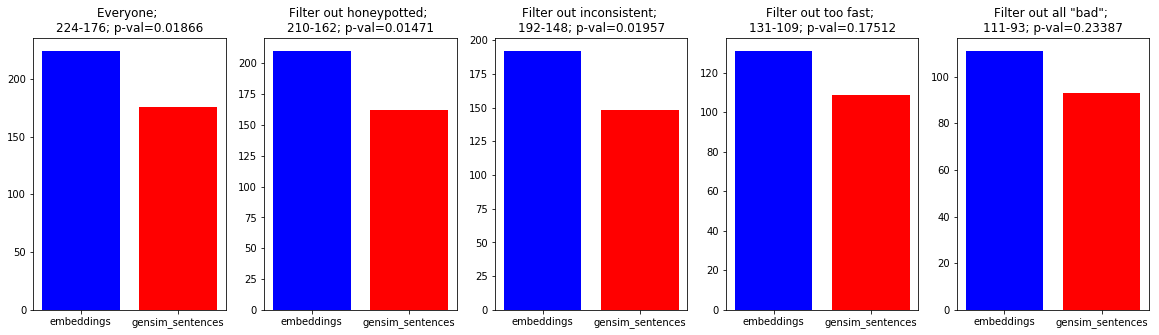

In [12]:
pairs = df[df.golden.isna()].groupby(
        by=['algs'], 
    )
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    print(algs)
    data = pair[1]
    plot_barplots(data)


### распределение ответов по письмам

embeddings__gensim_sentences
	letter1.png


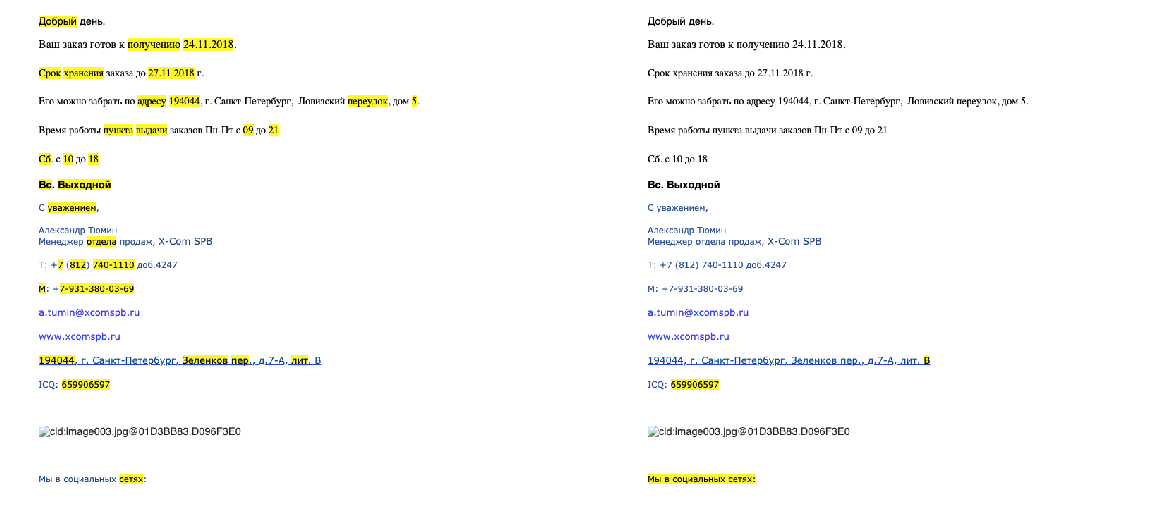

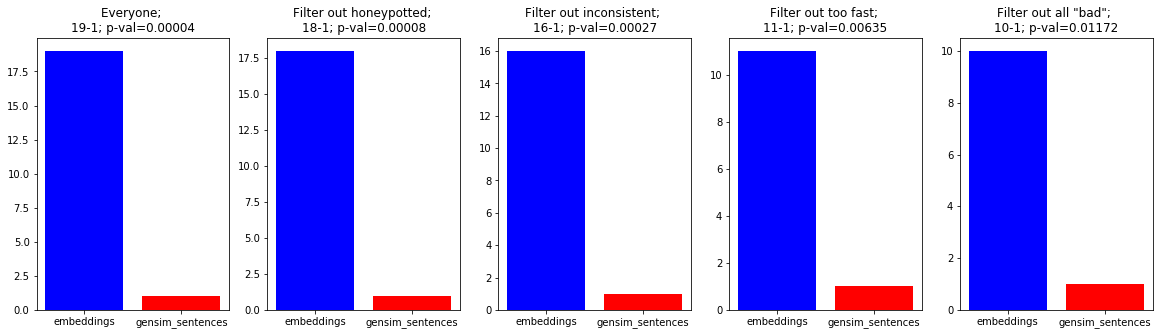

	letter10.png


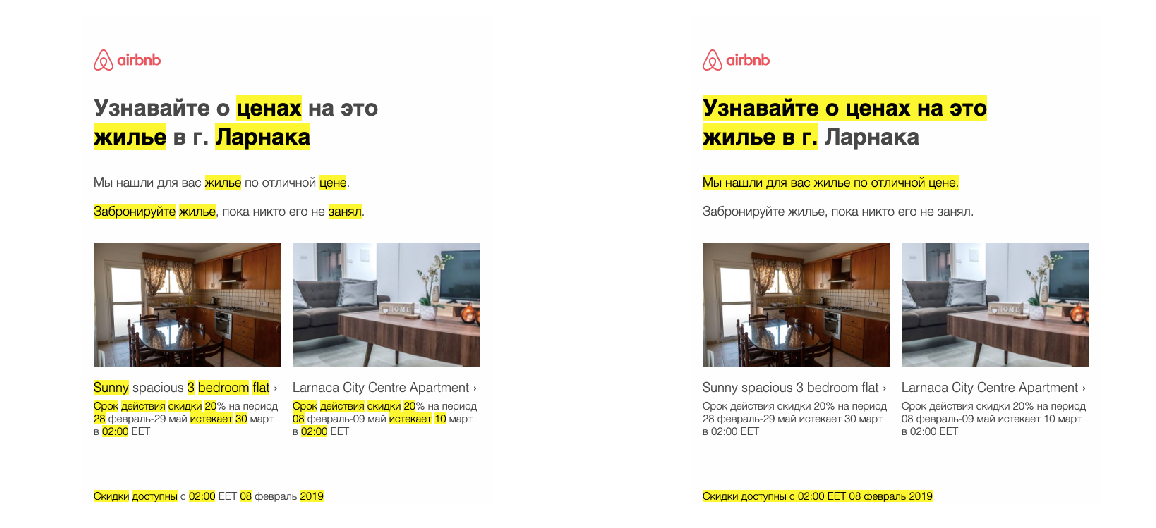

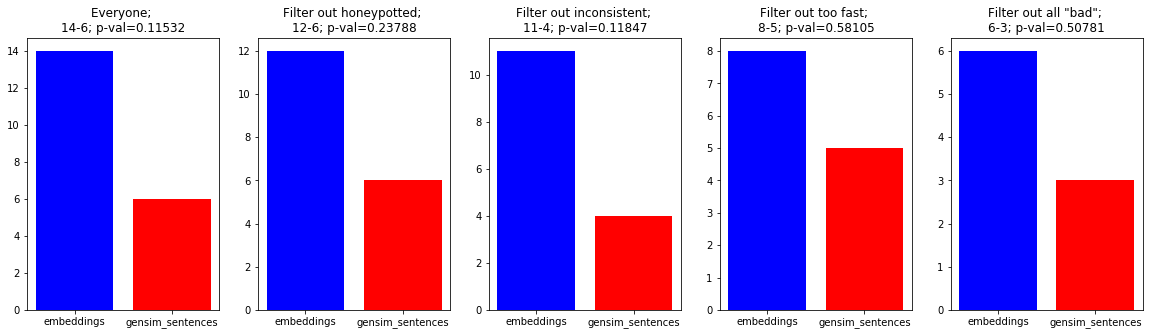

	letter11.png


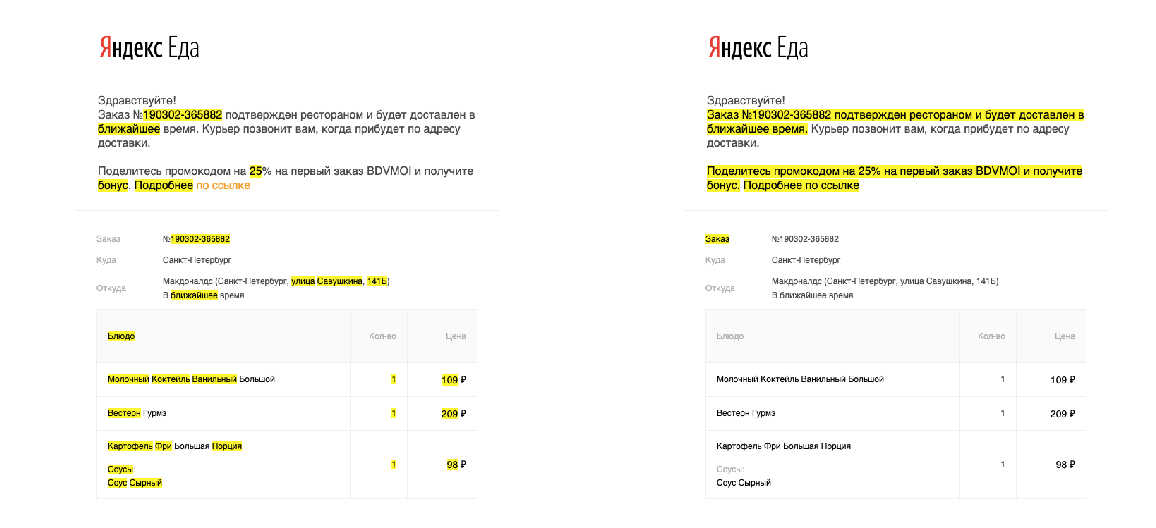

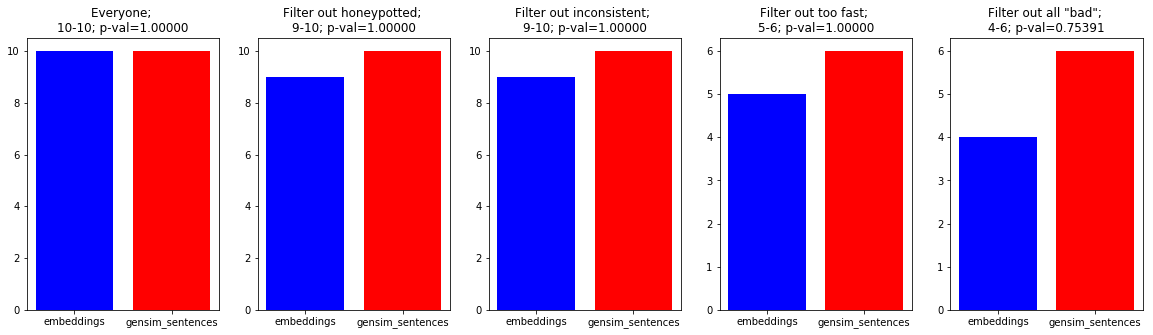

	letter12.png


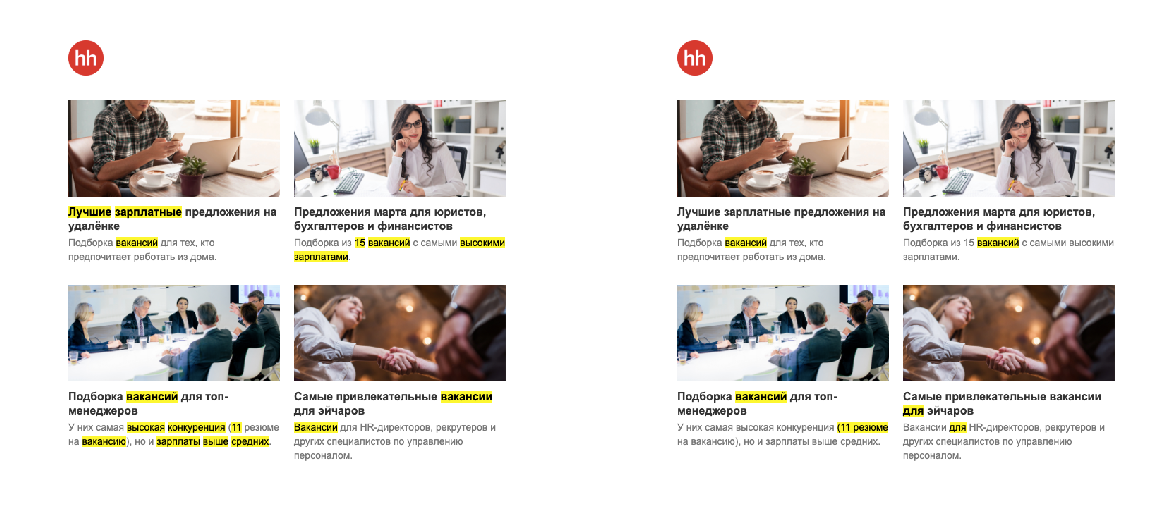

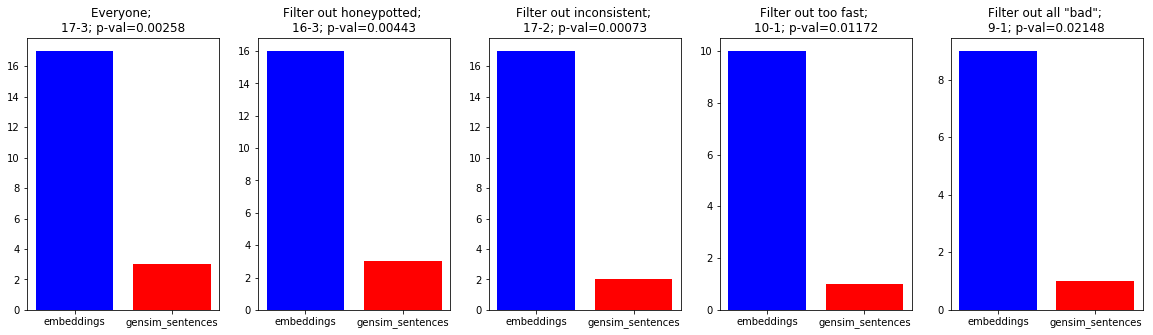

	letter13.png


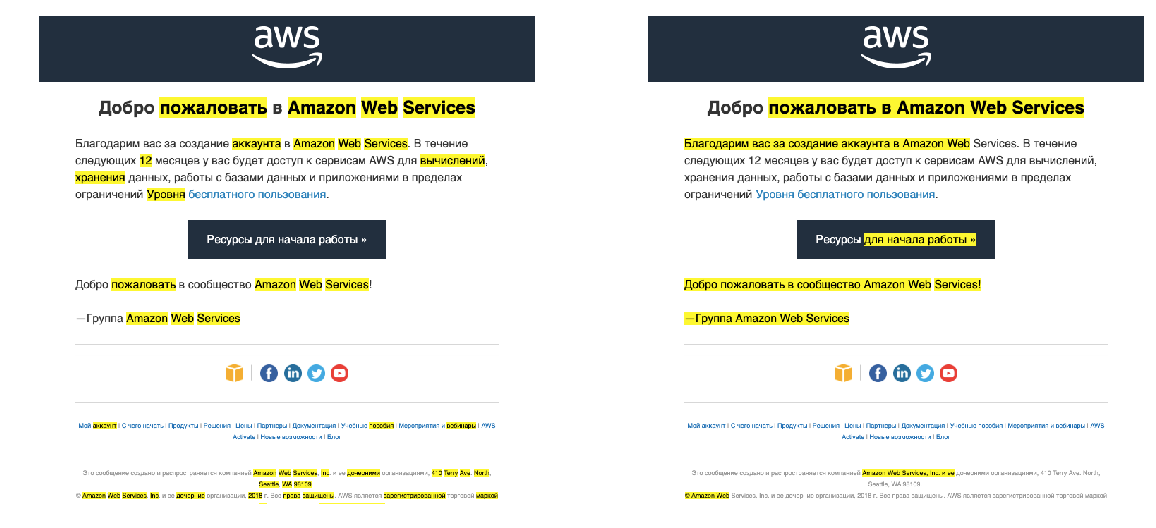

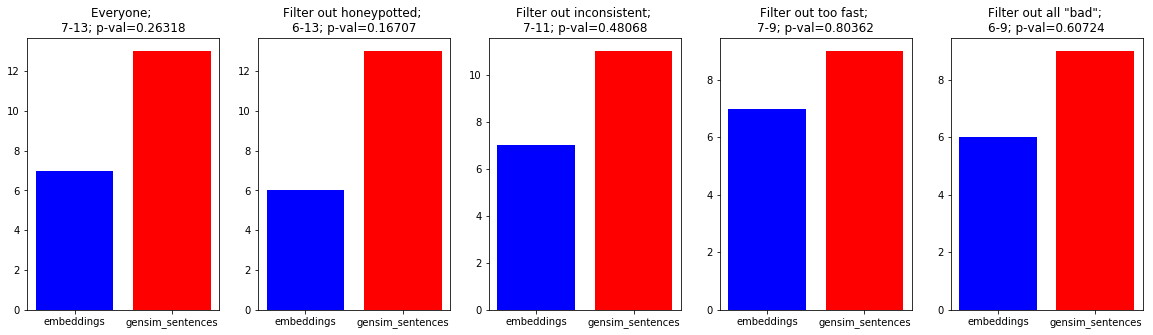

	letter14.png


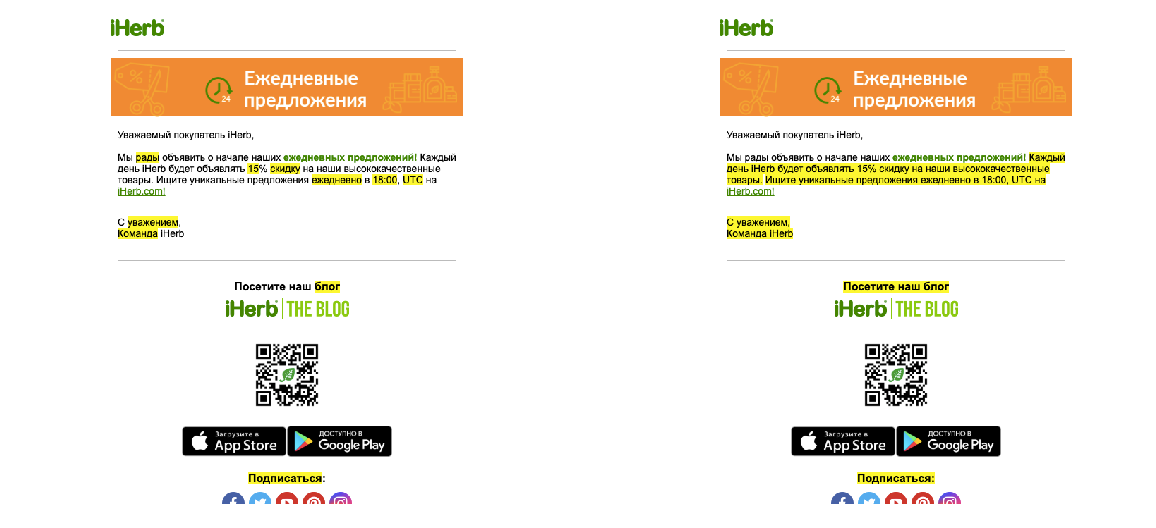

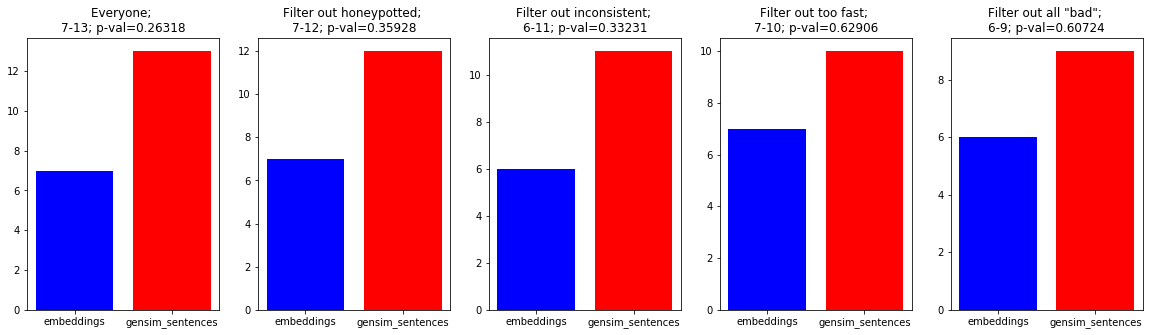

	letter15.png


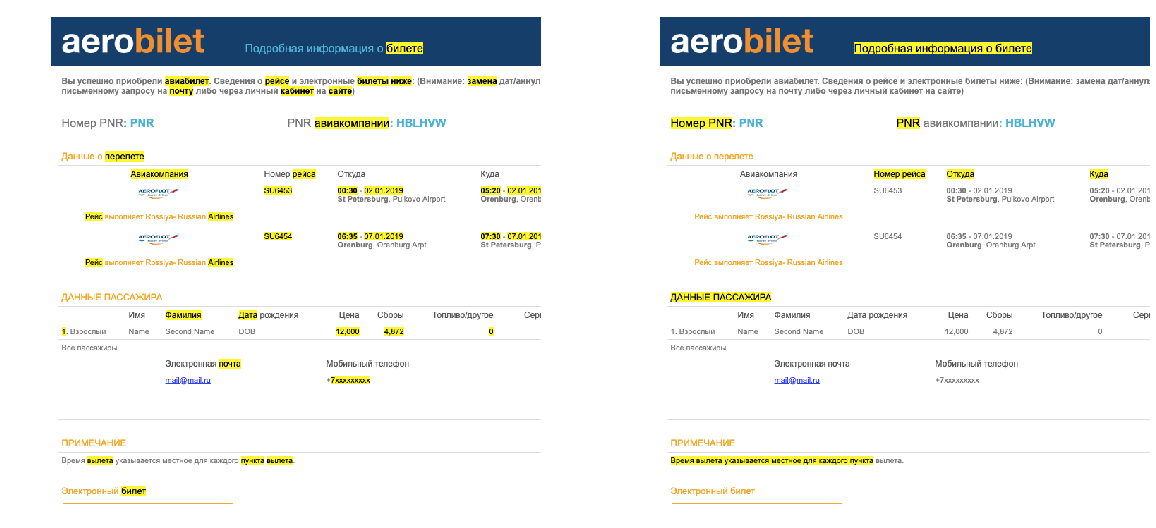

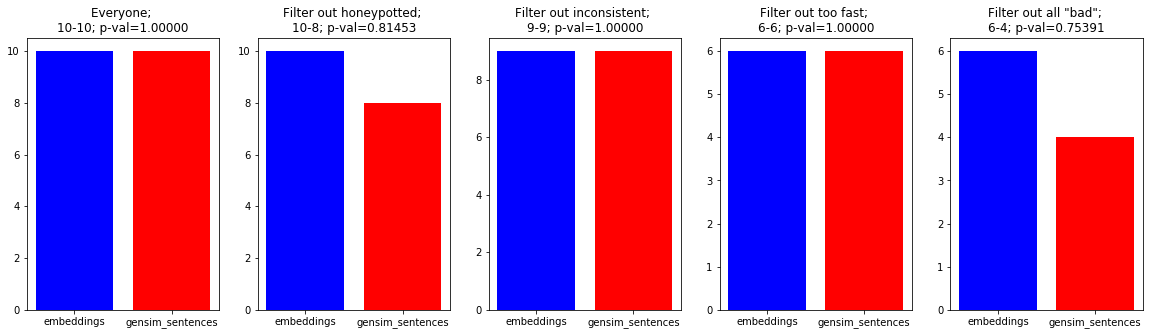

	letter16.png


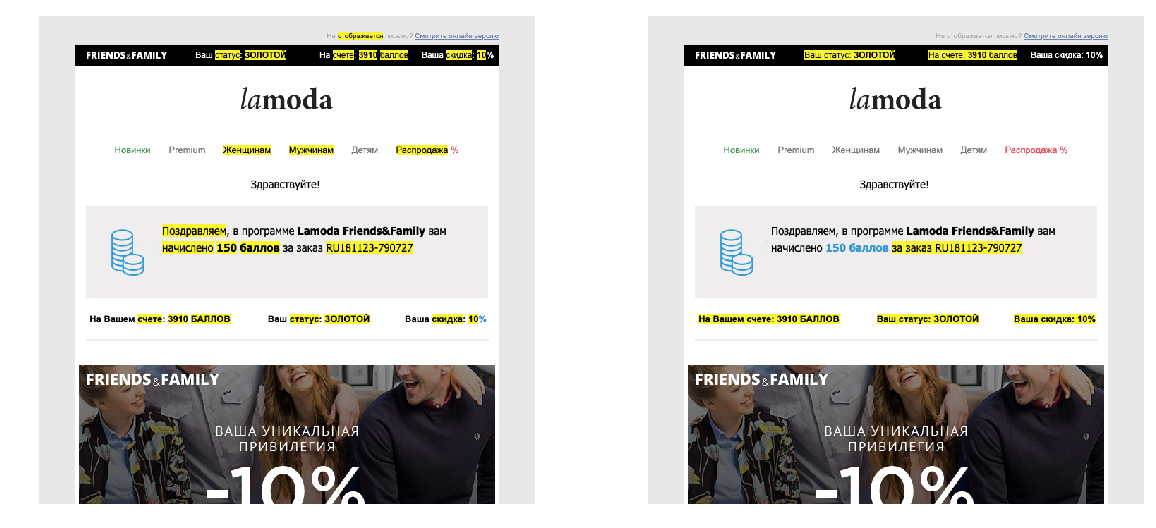

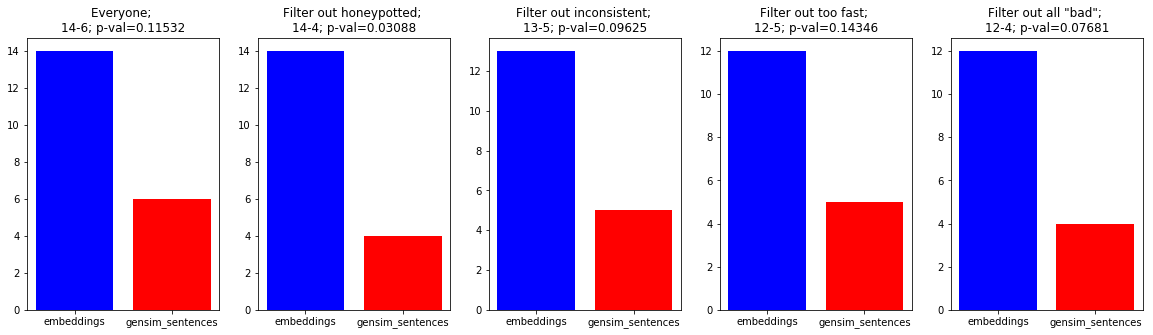

	letter17.png


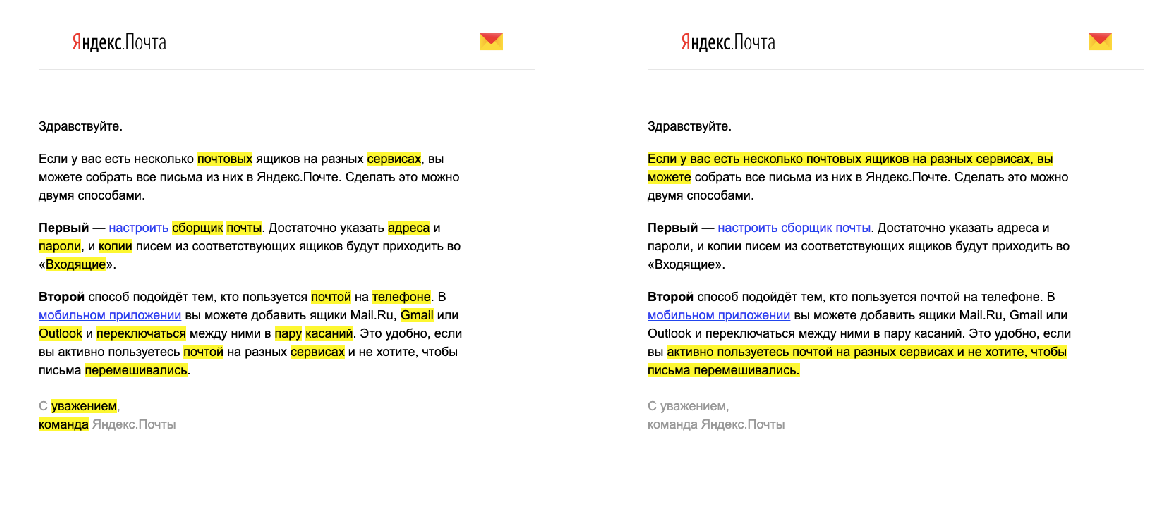

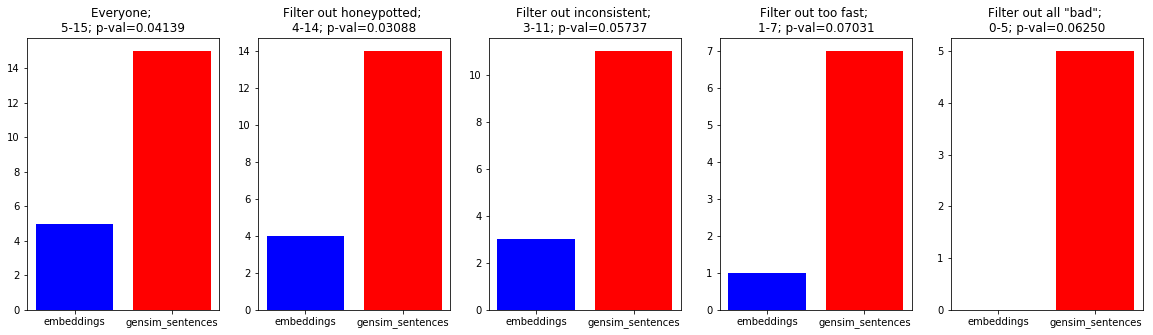

	letter18.png


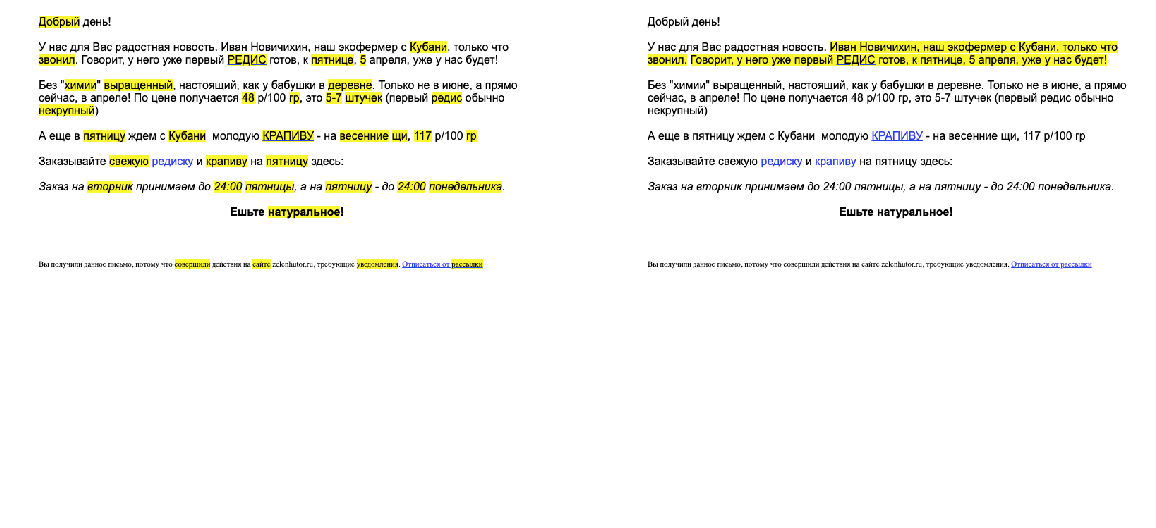

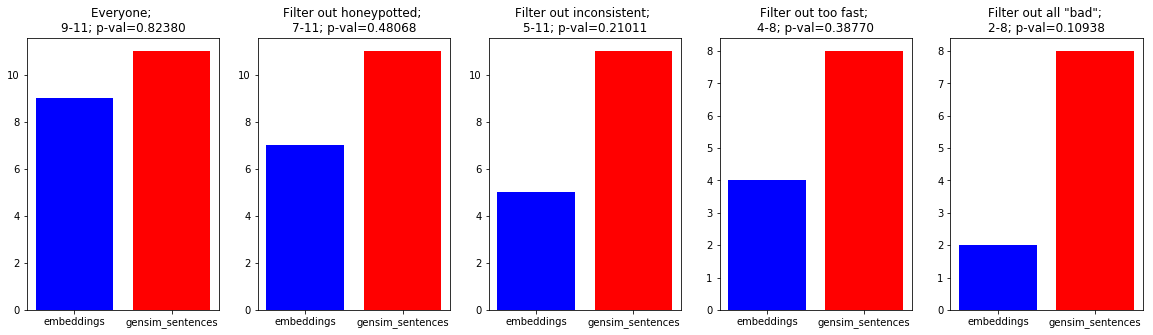

	letter19.png


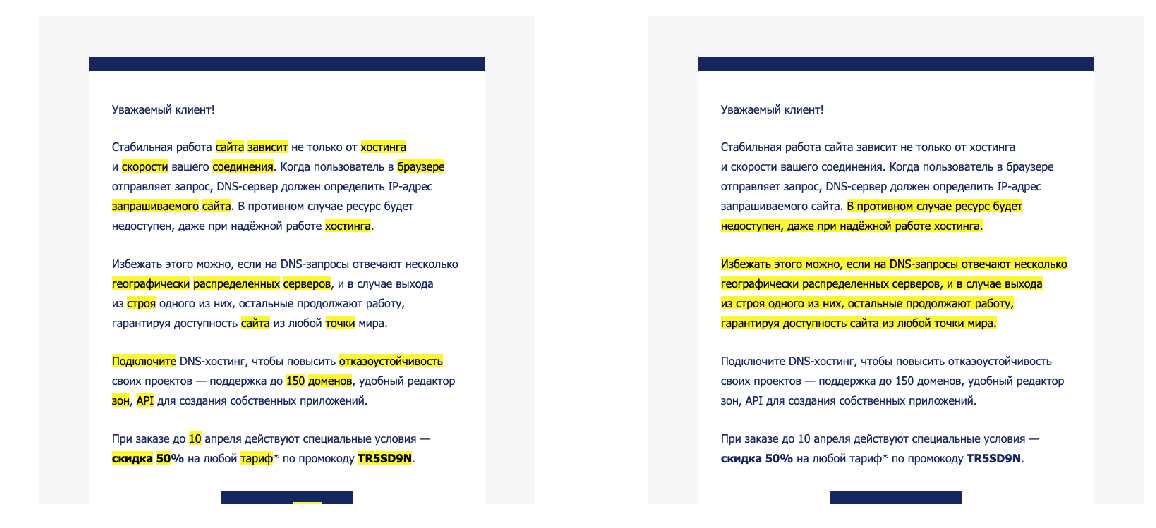

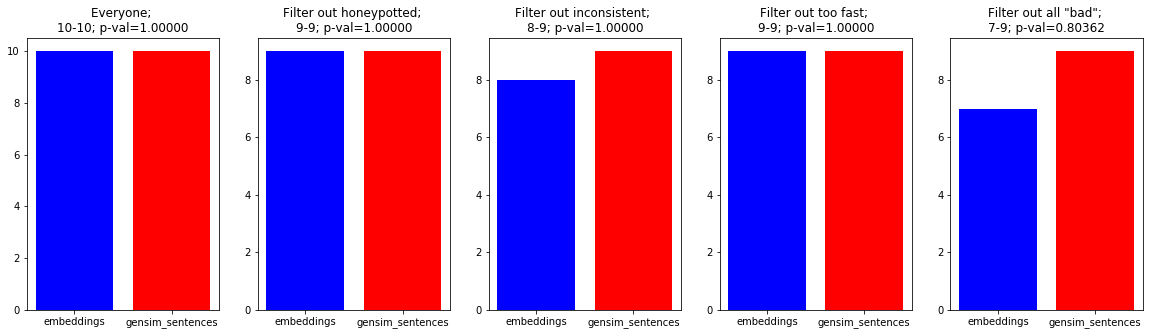

	letter2.png


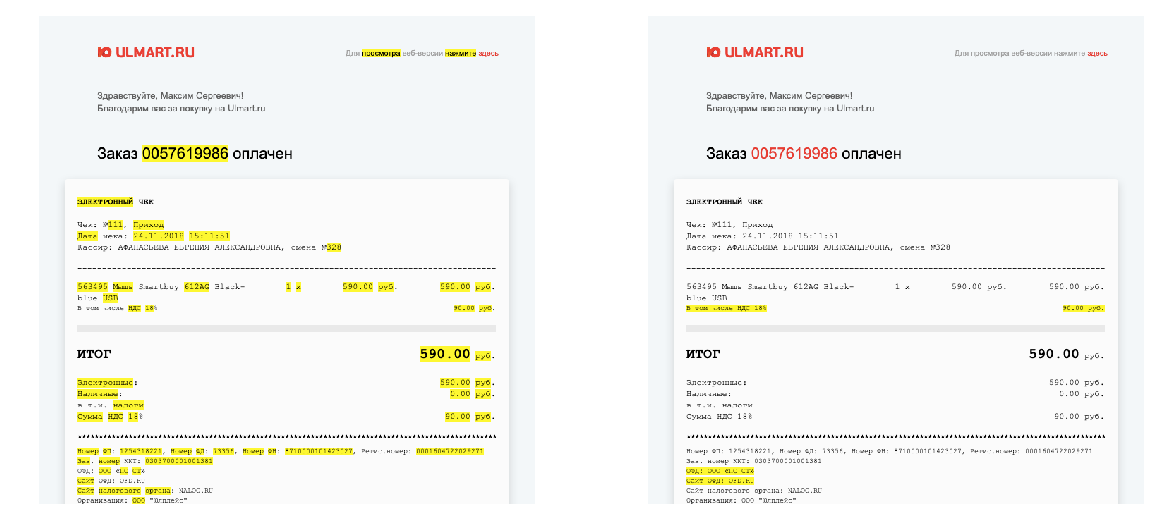

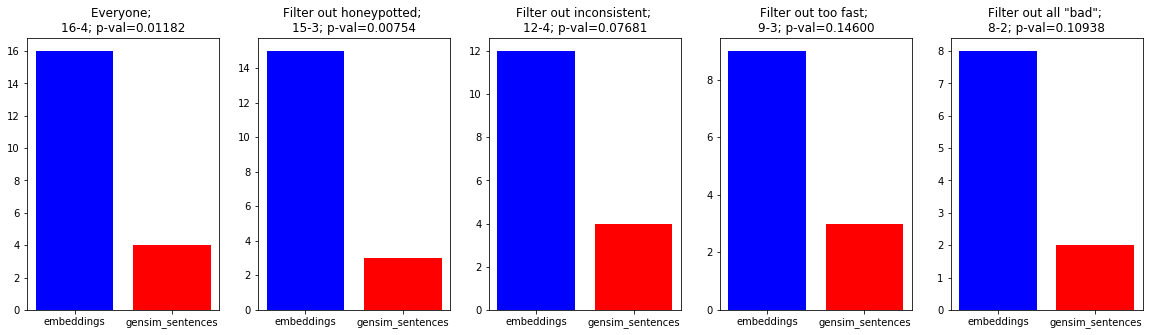

	letter20.png


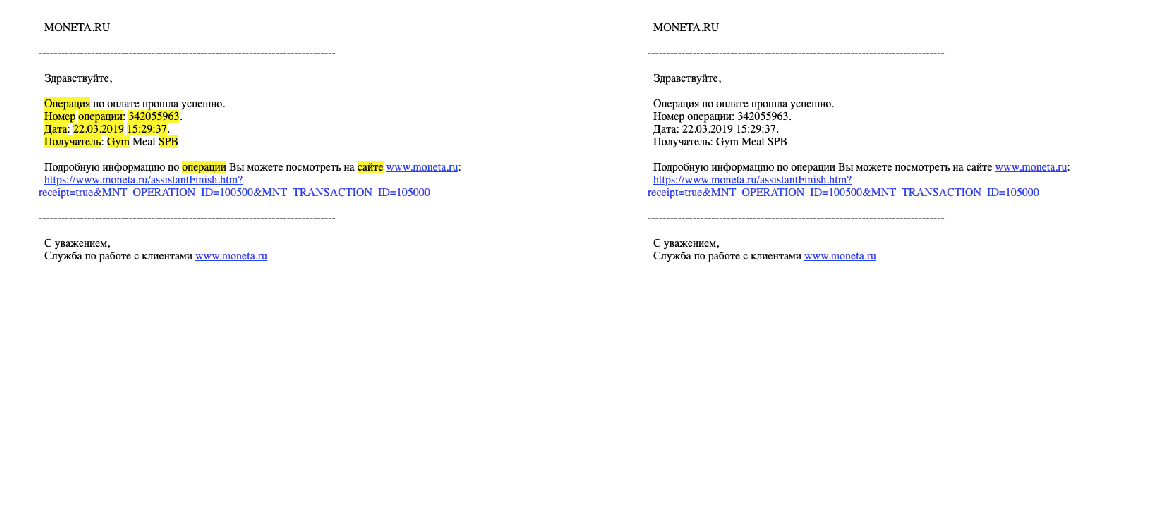

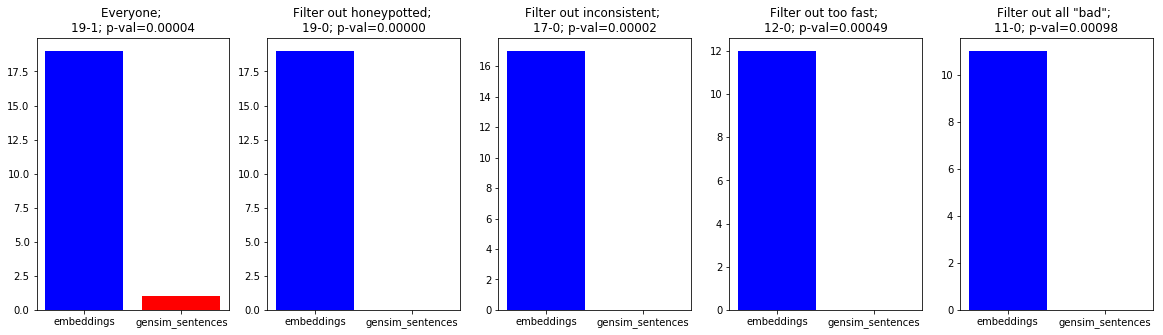

	letter3.png


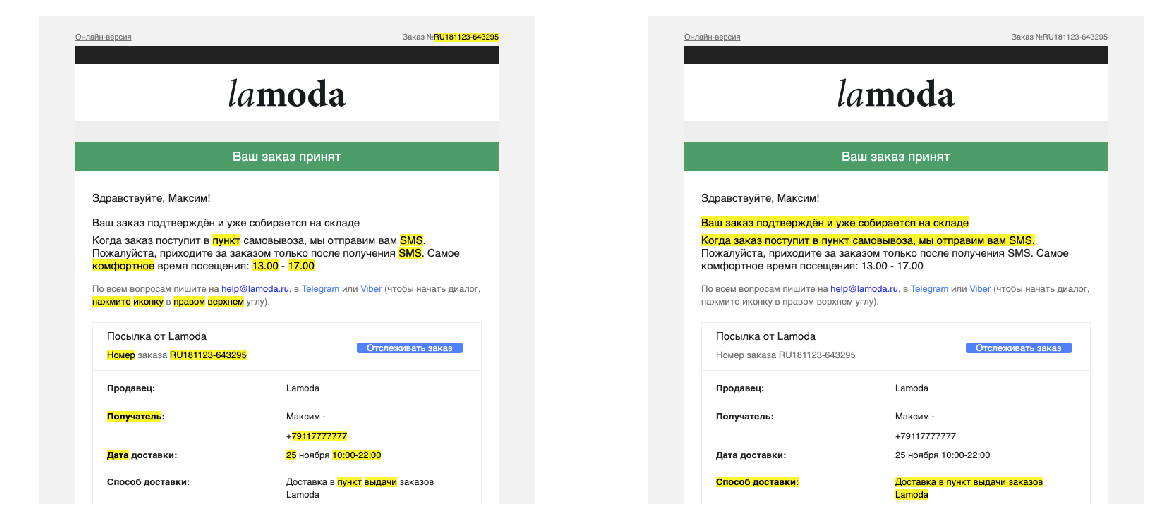

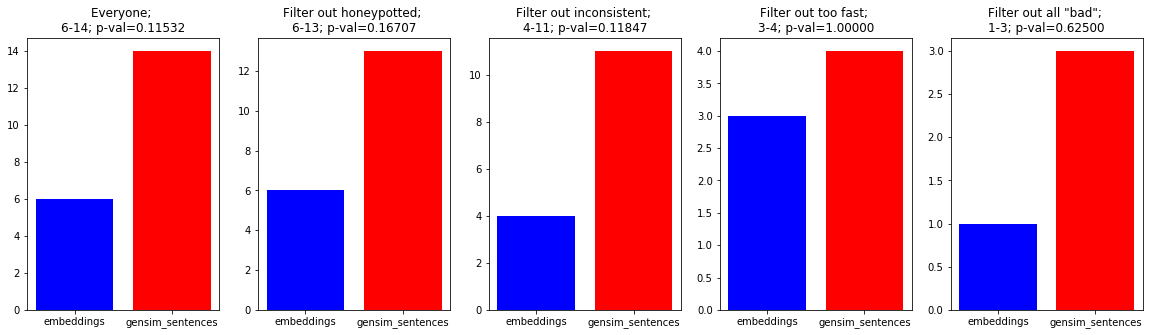

	letter4.png


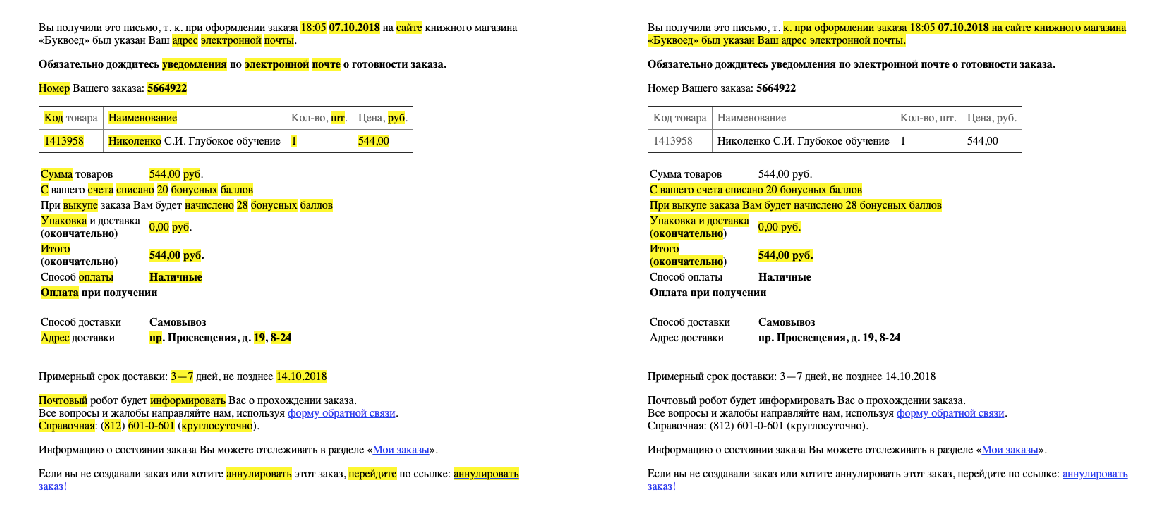

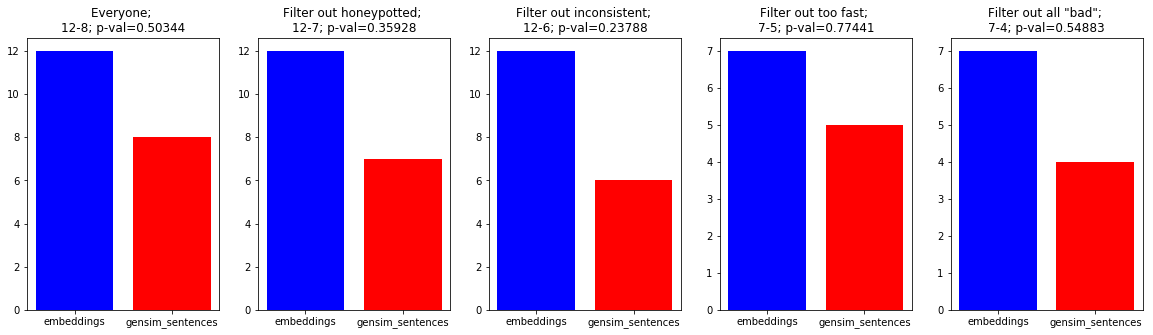

	letter5.png


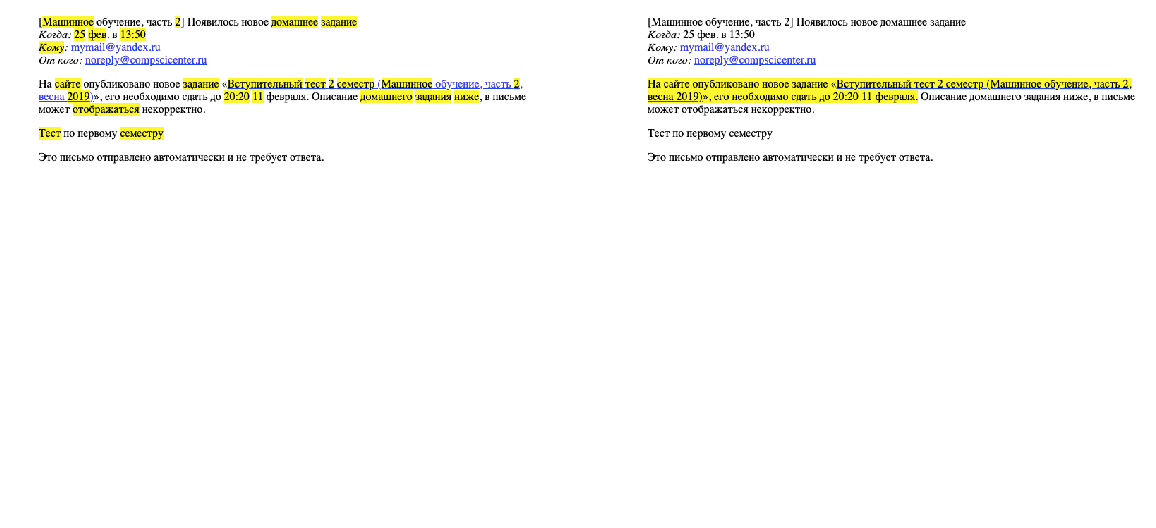

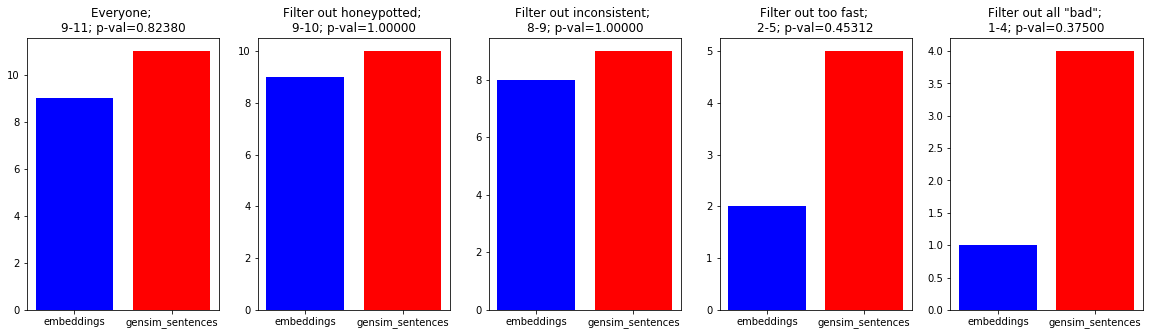

	letter6.png


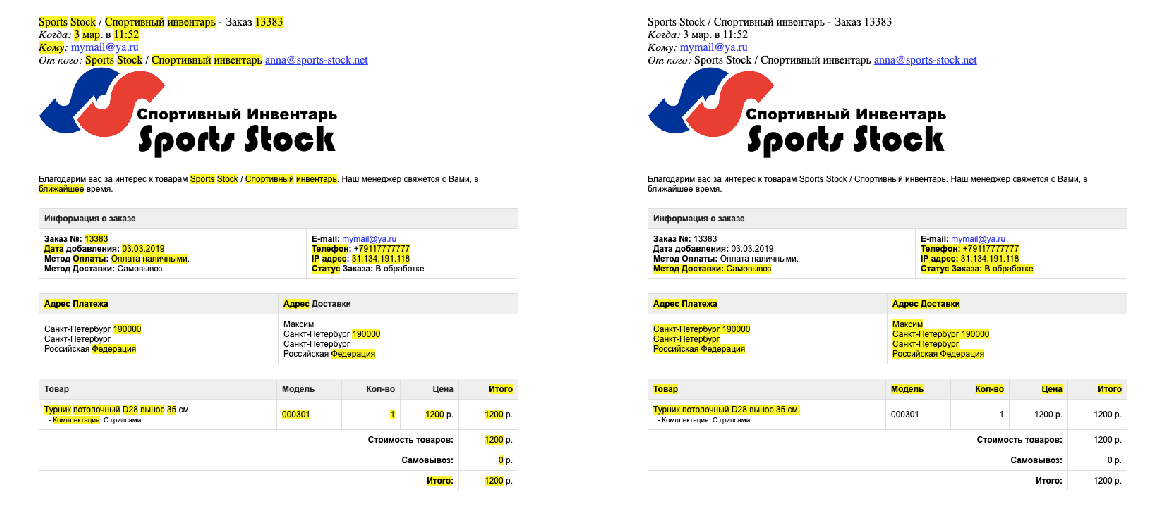

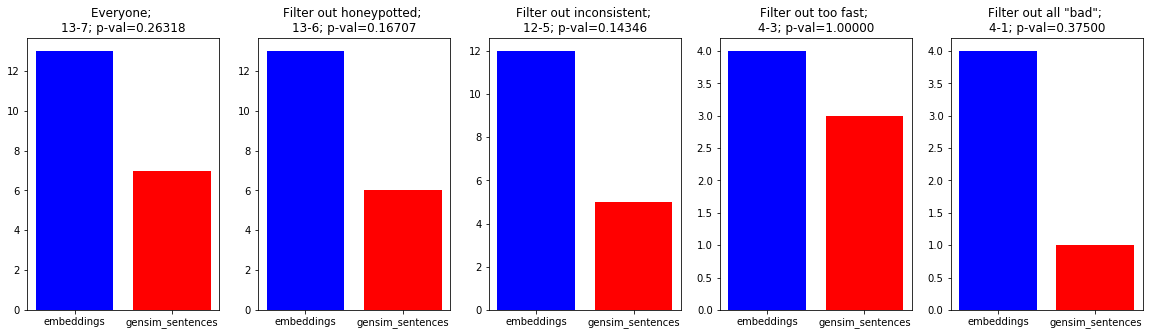

	letter7.png


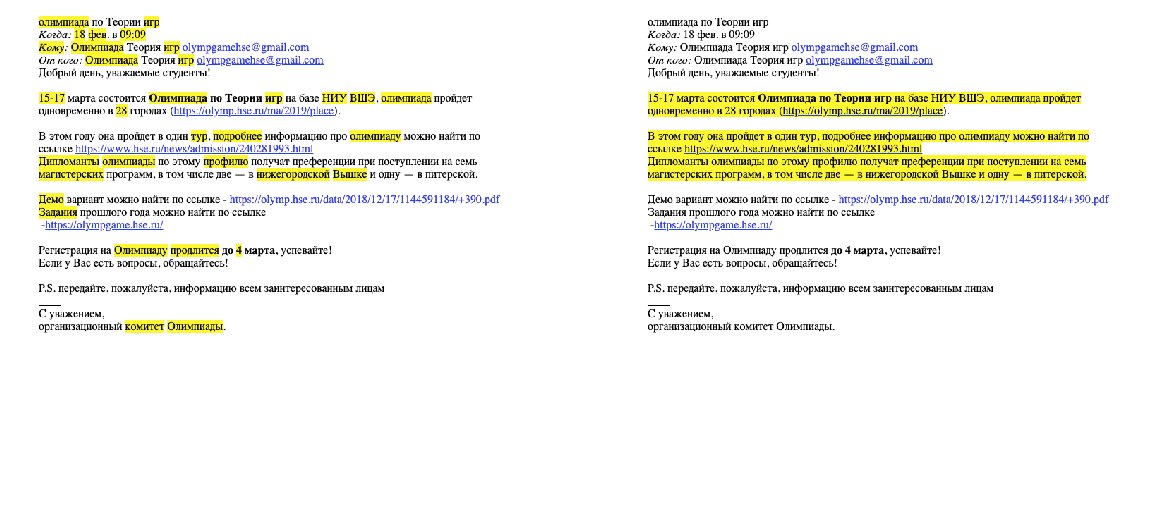

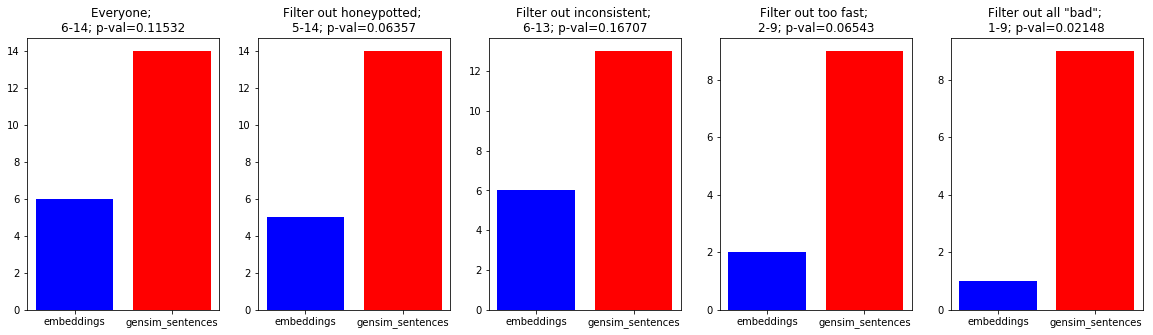

	letter8.png


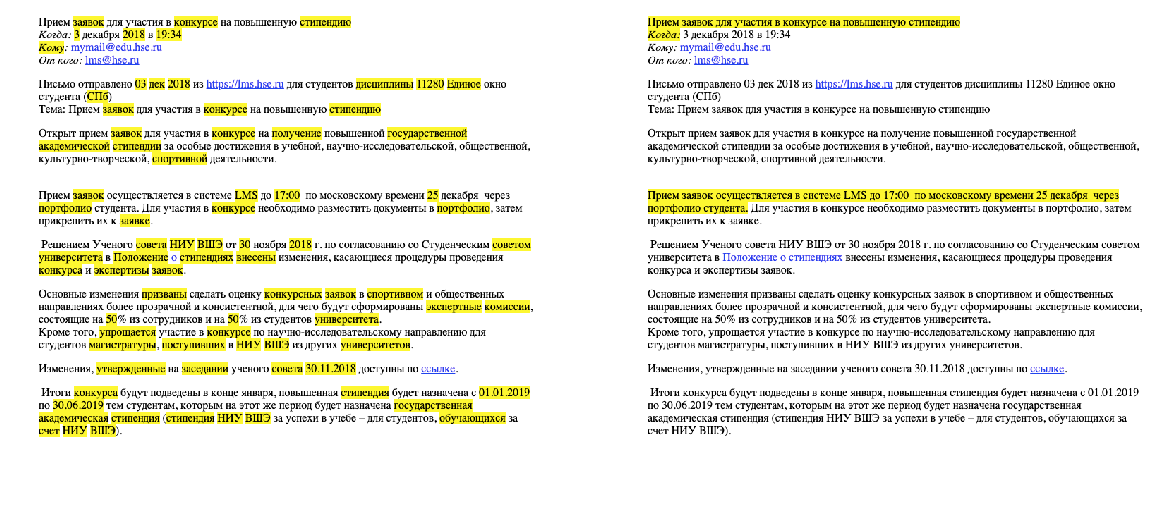

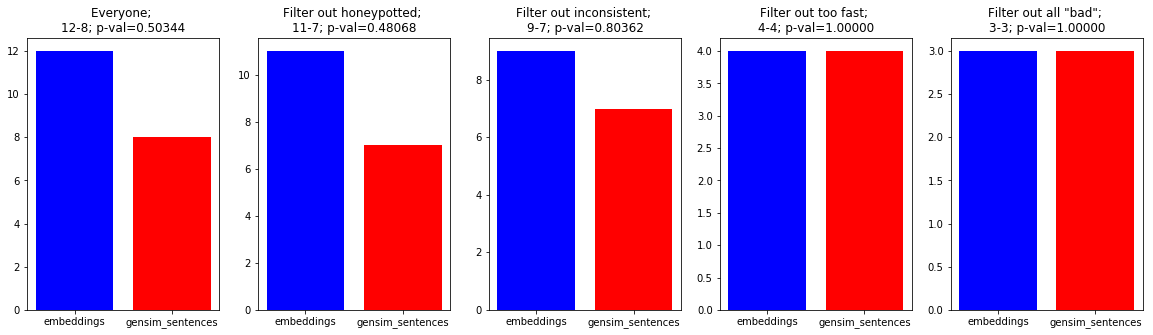

	letter9.png


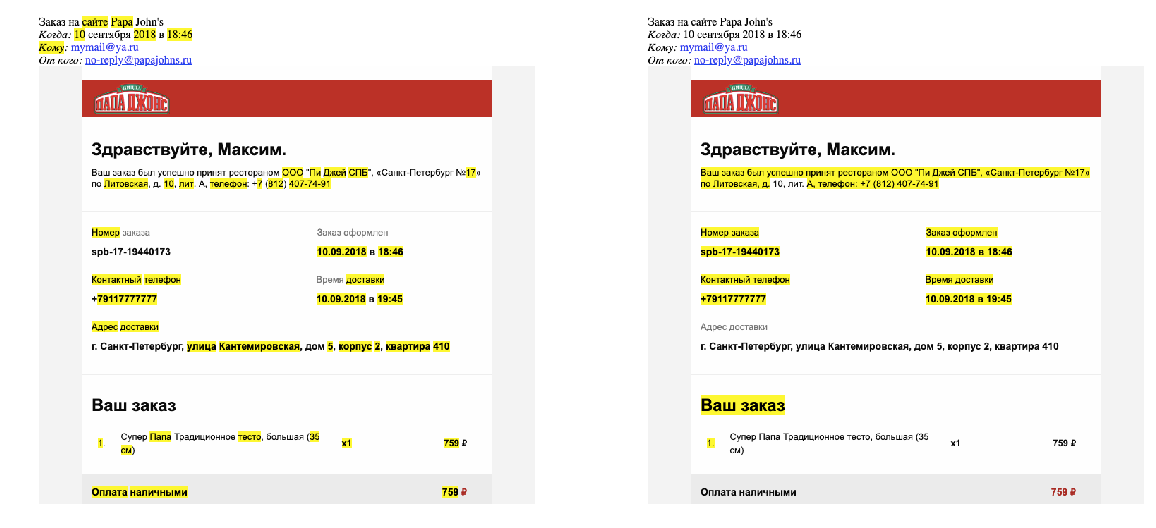

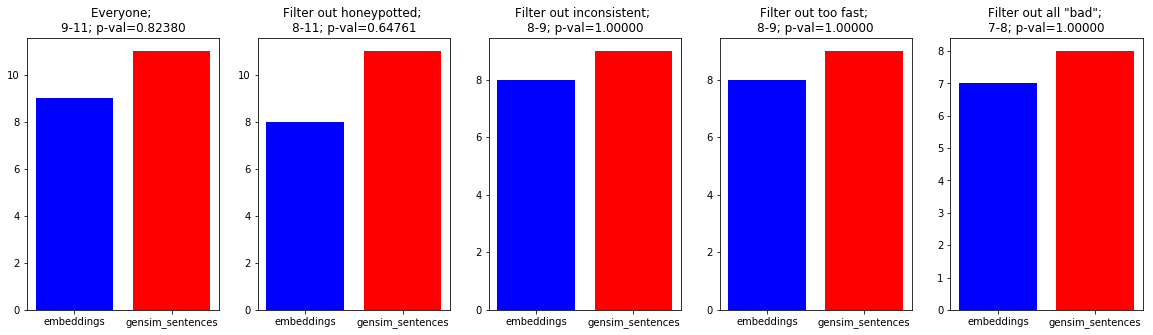

In [13]:
root_folder = '../screenshot_emails'
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    print(algs)
    algnames = sorted(algs.split('__'))
    for task in pair[1].groupby(by='task'):
        taskname = task[1].task.iloc[0]
        print('\t' + taskname)
        paths = ['/'.join([root_folder, algname, taskname]) for algname in algnames]
        imgs = [mpimg.imread(path) for path in paths]
        plt.figure(figsize=(20, 10))
        for i, img in enumerate(imgs):
            plt.subplot(1, len(imgs), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
        data = task[1]
        plot_barplots(data)

### К слову о качестве наших алгоритмов и работе ханипотов

embeddings__random


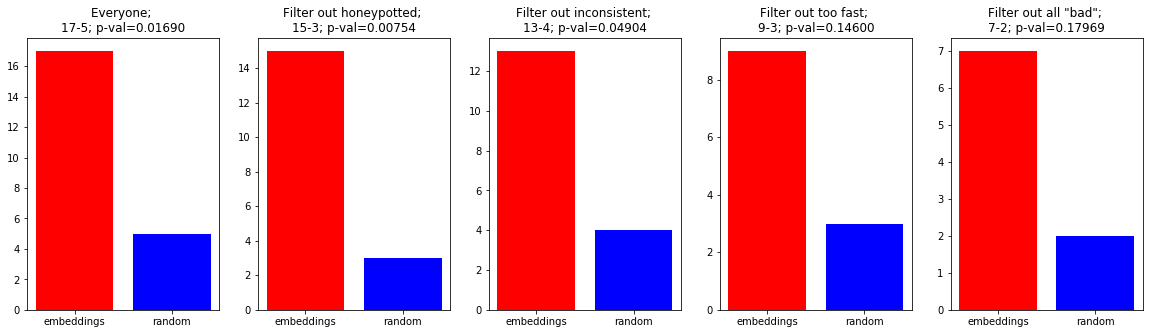

random__tf_idf_custom


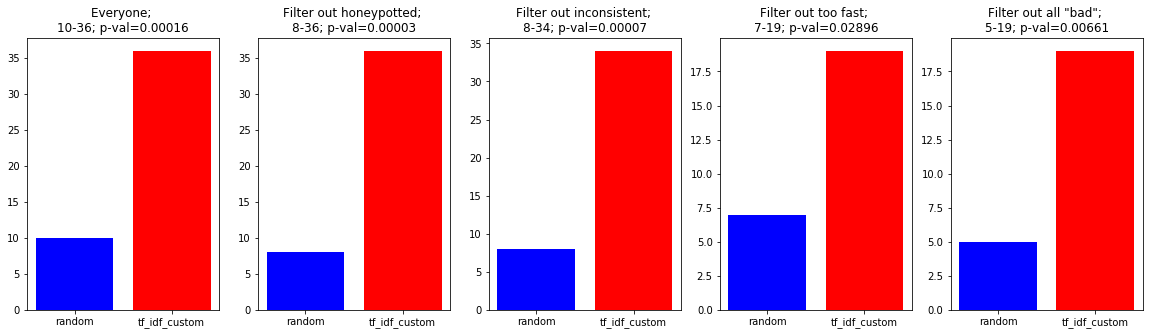

random__tf_idf_embeddings


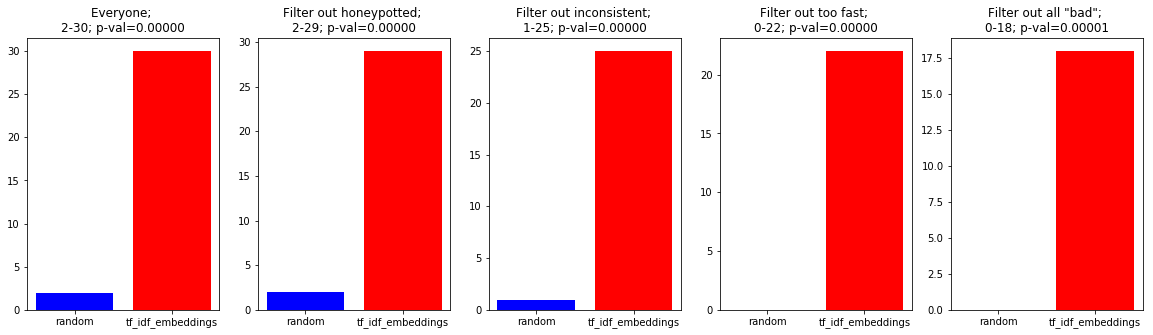

In [14]:
pairs = df[~df.golden.isna()].groupby('algs')
for _, data in pairs:
    algs = data.algs.iloc[0]
    print(algs)
    color = ['b', 'r']
    if algs.split('__')[0] != 'random':
        color.reverse()
    plot_barplots(data, color=color)